In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = ('/Users/Beba/Documents/JupyterNotebooks/NY2013Crimes.csv')
raw_crimes = pd.read_csv(data)
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
1,Greece Town,"96,667",151,0.0,NaN,9,60,82,"2,303",332,"1,925",46,NaN
2,Sleepy Hollow Village,"9,996",8,1.0,NaN,0,1,6,58,9,47,2,0.0
3,Potsdam Village,"9,613",8,0.0,NaN,1,0,7,190,17,168,5,NaN
4,Cornwall Town,"9,543",1,0.0,NaN,0,0,1,42,10,32,0,NaN


In [39]:
raw_crimes.drop('Arson3', axis=1, inplace=True)

In [42]:
raw_crimes.isnull().sum()

City                                      0
Population                                0
Violent\ncrime                            0
Murder and\nnonnegligent\nmanslaughter    0
Rape\n(legacy\ndefinition)2               0
Robbery                                   0
Aggravated\nassault                       0
Property\ncrime                           0
Burglary                                  0
Larceny-\ntheft                           0
Motor\nvehicle\ntheft                     0
dtype: int64

In [40]:
raw_crimes.dropna(axis=0, inplace=True)

In [41]:
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Albany,"97,956",791,8.0,30,227,526,"4,090",705,"3,243",142
1,Greece Town,"96,667",151,0.0,9,60,82,"2,303",332,"1,925",46
2,Sleepy Hollow Village,"9,996",8,1.0,0,1,6,58,9,47,2
3,Potsdam Village,"9,613",8,0.0,1,0,7,190,17,168,5
4,Cornwall Town,"9,543",1,0.0,0,0,1,42,10,32,0


In [54]:
raw_crimes.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Rape                                      float64
Assault                                   float64
dtype: object

In [48]:
raw_crimes['Rape'] = raw_crimes['Rape\n(legacy\ndefinition)2'].str.replace(',','').astype(float)
raw_crimes['Robbery'] = raw_crimes['Robbery'].str.replace(',','').astype(float)
raw_crimes['Assault'] = raw_crimes['Aggravated\nassault'].str.replace(',','').astype(float)
raw_crimes['Property\ncrime'] = raw_crimes['Property\ncrime'].str.replace(',','').astype(float)
raw_crimes['Burglary'] = raw_crimes['Burglary'].str.replace(',','').astype(float)
raw_crimes['Larceny-\ntheft'] = raw_crimes['Larceny-\ntheft'].str.replace(',','').astype(float)
raw_crimes['Motor\nvehicle\ntheft'] = raw_crimes['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)


In [63]:
raw_crimes.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Robbery                                   float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Rape                                      float64
Assault                                   float64
dtype: object

In [50]:
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Rape,Assault
0,Albany,97956.0,791.0,8.0,30,227.0,526,4090.0,705.0,3243.0,142.0,30.0,526.0
1,Greece Town,96667.0,151.0,0.0,9,60.0,82,2303.0,332.0,1925.0,46.0,9.0,82.0
2,Sleepy Hollow Village,9996.0,8.0,1.0,0,1.0,6,58.0,9.0,47.0,2.0,0.0,6.0
3,Potsdam Village,9613.0,8.0,0.0,1,0.0,7,190.0,17.0,168.0,5.0,1.0,7.0
4,Cornwall Town,9543.0,1.0,0.0,0,0.0,1,42.0,10.0,32.0,0.0,0.0,1.0


In [55]:
raw_crimes.drop(['Rape\n(legacy\ndefinition)2'], axis=1, inplace=True)
raw_crimes.drop(['Aggravated\nassault'], axis=1, inplace=True)

In [61]:
scaled_crimes = pd.DataFrame()

scaled_crimes['Population'] = preprocessing.scale(raw_crimes['Population'])
scaled_crimes['Murder and\nnonnegligent\nmanslaughter'] = preprocessing.scale(raw_crimes['Murder and\nnonnegligent\nmanslaughter'])
scaled_crimes['Robbery'] = preprocessing.scale(raw_crimes['Robbery'])
scaled_crimes['Burglary'] = preprocessing.scale(raw_crimes['Burglary'])
scaled_crimes['Larceny-\ntheft'] = preprocessing.scale(raw_crimes['Larceny-\ntheft'])
scaled_crimes['Motor\nvehicle\ntheft'] = preprocessing.scale(raw_crimes['Motor\nvehicle\ntheft'])
scaled_crimes['Rape'] = preprocessing.scale(raw_crimes['Rape'])
scaled_crimes['Assault'] = preprocessing.scale(raw_crimes['Assault'])


In [130]:
from scipy.stats import mstats
winsorized_Assault = mstats.winsorize(raw_crimes['Assault'], limits=[0.05, 0.05])

scaled_crimes['Assault_Category'] = np.where((raw_crimes['Assault'] > (winsorized_Assault.mean())), 1, 0)

In [125]:
winsorized_Assault.mean()

13.761494252873563

In [126]:
raw_crimes['Assault'].mean()

121.26149425287356

In [140]:
scaled_crimes.drop(['Violent\ncrime'], inplace=True, axis=1)
scaled_crimes.drop(['Property\ncrime'], inplace=True, axis=1)

In [141]:
scaled_crimes.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Burglary,Larceny- theft,Motor vehicle theft,Rape,PopulationSq,PopulationCube,PopXMurder,PopXRobbery,PopXBurglary,PopXLarceny,PopXMotorTheft,PopXRape,Assault_Category
0,0.128882,0.352015,0.149675,0.633720,0.411237,0.263365,0.399994,0.016611,0.002141,0.045368,0.019290,0.081675,0.053001,0.033943,0.051552,1
1,0.126014,-0.085685,-0.012532,0.229874,0.203250,0.025059,0.051958,0.015879,0.002001,-0.010797,-0.001579,0.028967,0.025612,0.003158,0.006547,1
2,-0.066850,-0.030972,-0.069839,-0.119837,-0.093108,-0.084165,-0.097201,0.004469,-0.000299,0.002070,0.004669,0.008011,0.006224,0.005626,0.006498,0
3,-0.067702,-0.085685,-0.070810,-0.111176,-0.074013,-0.076718,-0.080627,0.004584,-0.000310,0.005801,0.004794,0.007527,0.005011,0.005194,0.005459,0
4,-0.067858,-0.085685,-0.070810,-0.118755,-0.095475,-0.089129,-0.097201,0.004605,-0.000312,0.005814,0.004805,0.008058,0.006479,0.006048,0.006596,0


## cleaned the data, now create features

In [311]:
scaled_crimes['PopulationSq'] = (scaled_crimes['Population']) ** 2
scaled_crimes['PopulationCube'] = (scaled_crimes['Population']) ** 3
scaled_crimes['PopXMurder'] = scaled_crimes['Population'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['PopXRobbery'] = scaled_crimes['Population'] * scaled_crimes['Robbery']
scaled_crimes['PopXBurglary'] = scaled_crimes['Population'] * scaled_crimes['Burglary']
scaled_crimes['PopXLarceny'] = scaled_crimes['Population'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['PopXMotorTheft'] = scaled_crimes['Population'] * scaled_crimes['Motor\nvehicle\ntheft']
scaled_crimes['PopXRape'] = scaled_crimes['Population'] * scaled_crimes['Rape']
scaled_crimes['RobXMurder'] = scaled_crimes['Robbery'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['RapeXMurder'] = scaled_crimes['Rape'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['LarcenyXMurder'] = scaled_crimes['Larceny-\ntheft'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['BurglaryXMurder'] = scaled_crimes['Burglary'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['RobberyXLarceny'] = scaled_crimes['Robbery'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['BurglaryXLarceny'] = scaled_crimes['Burglary'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['RapeXLarceny'] = scaled_crimes['Rape'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['MotorTheftXLarceny'] = scaled_crimes['Motor\nvehicle\ntheft'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['BurglaryXMotorTheft'] = scaled_crimes['Burglary'] * scaled_crimes['Motor\nvehicle\ntheft']
scaled_crimes['RapeXRobbery'] = scaled_crimes['Rape'] * scaled_crimes['Robbery']
scaled_crimes['RapeXBurglary'] = scaled_crimes['Rape'] * scaled_crimes['Burglary']
scaled_crimes['RapeXMotorTheft'] = scaled_crimes['Rape'] * scaled_crimes['Motor\nvehicle\ntheft']


## split training and test sets

In [312]:
trainsize = int(scaled_crimes.shape[0] / 2)
crimes_test = scaled_crimes.iloc[trainsize:, :].copy()
crimes_train = scaled_crimes.iloc[:trainsize, :].copy()

In [313]:
Y_train = crimes_train['Assault_Category']
X_train = crimes_train.loc[:, ~(crimes_train.columns).isin(['Assault_Category'])]

Y_test = crimes_test['Assault_Category']
X_test = crimes_test.loc[:, ~(crimes_test.columns).isin(['Assault_Category'])]


In [298]:
new_df = pd.DataFrame()

raw_pop = raw_crimes['Population']
bins = [0, 10000, 15000, 25000, 50000, 75000, 300000, 10000000]
labels = ['village',
          'small_town',
          'med_town',
          'lg_town',
          'small_city',
          'medium_city',
          'large_city']

new_df['Population_Category'] = pd.cut(raw_pop, bins=bins,labels=labels)

new_df.head()

,Population_Category
0,medium_city
1,medium_city
2,village
3,village
4,village


In [299]:
new_df['Population_Category'].value_counts()

village        210
lg_town         44
med_town        38
small_town      35
medium_city     12
small_city       8
large_city       1
Name: Population_Category, dtype: int64

In [303]:
cleanup_nums = {'Population_Category':     {'village': 1,
                                            'small_town': 2,
                                            'med_town': 3,
                                            'lg_town': 4,
                                            'small_city': 5,
                                            'medium_city': 6,
                                            'large_city': 7}}

In [304]:
new_df.replace(cleanup_nums, inplace=True)

# Models

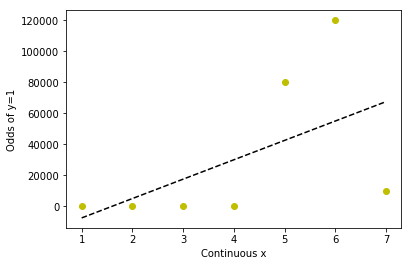

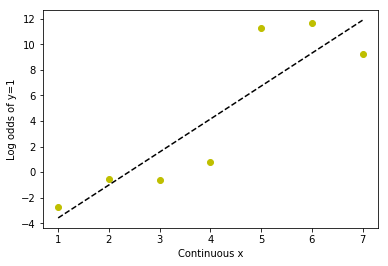

In [307]:
x = new_df['Population_Category']
bin_y = scaled_crimes['Assault_Category']

xvals = np.unique(x)

yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  
    y0_ct = len(bin_y[x == xi]) - y1_ct +.0001 
    yodds.append((y1_ct / y0_ct))  
      
fit = np.polyfit(xvals, yodds, 1)
fit_fn = np.poly1d(fit)

plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

ln_yodds = np.log(yodds)
fit2 = np.polyfit(xvals, ln_yodds, 1)
fit_fn2 = np.poly1d(fit2)

plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn2(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')
plt.show()

In [329]:
#Ridge

ridgeregr1 = linear_model.Ridge(alpha=1, fit_intercept=False) 
ridgeregr1.fit(X_train, Y_train)
print("test alpha 1")
print(ridgeregr1.score(X_train, Y_train))
print(ridgeregr1.score(X_test, Y_test))

test alpha 1
-0.0593118433604
-8.35046777104


In [330]:
ridgeregr2 = linear_model.Ridge(alpha=5, fit_intercept=False) 
ridgeregr2.fit(X_train, Y_train)
print("test alpha 5")
print(ridgeregr2.score(X_train, Y_train))
print(ridgeregr2.score(X_test, Y_test))

test alpha 5
-0.260863817007
-1.4147882462


In [331]:
ridgeregr3 = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr3.fit(X_train, Y_train)
print("test alpha 10")
print(ridgeregr3.score(X_train, Y_train))
print(ridgeregr3.score(X_test, Y_test))

test alpha 10
-0.3205497964
-0.48634344365


In [333]:
ridgeregr4 = linear_model.Ridge(alpha=20, fit_intercept=False) 
ridgeregr4.fit(X_train, Y_train)
print("test alpha 20")
print(ridgeregr4.score(X_train, Y_train))
print(ridgeregr4.score(X_test, Y_test))

test alpha 20
-0.359331690866
-0.218457526489


In [332]:
ridgeregr5 = linear_model.Ridge(alpha=50, fit_intercept=False) 
ridgeregr5.fit(X_train, Y_train)
print('test alpha 50')
print(ridgeregr5.score(X_train, Y_train))
print(ridgeregr5.score(X_test, Y_test))

test alpha 50
-0.387856241496
-0.191198436691


In [334]:
#Lasso

lass1 = linear_model.Lasso(alpha=.35)
lassfit1 = lass1.fit(X_train, Y_train)
print('R² for the model:')
print(lass1.score(X_train, Y_train))
print(lass1.score(X_test, Y_test))


R² for the model:
0.0131942911818
-0.0462404363306


In [335]:
lass2 = linear_model.Lasso(alpha=.5)
lassfit2 = lass2.fit(X_train, Y_train)
print('R² for the model:')
print(lass2.score(X_train, Y_train))
print(lass2.score(X_test, Y_test))


R² for the model:
0.013191742452
-0.046265112811


In [336]:
lass3 = linear_model.Lasso(alpha=1)
lassfit3 = lass3.fit(X_train, Y_train)
print('R² for the model:')
print(lass3.score(X_train, Y_train))
print(lass3.score(X_test, Y_test))


R² for the model:
0.0131767499236
-0.0463474152532


In [337]:
lass4 = linear_model.Lasso(alpha=5)
lassfit4 = lass4.fit(X_train, Y_train)
print('R² for the model:')
print(lass4.score(X_train, Y_train))
print(lass4.score(X_test, Y_test))


R² for the model:
0.0126969890157
-0.0470084659696


In [338]:
lass5 = linear_model.Lasso(alpha=10)
lassfit5 = lass5.fit(X_train, Y_train)
print('R² for the model:')
print(lass5.score(X_train, Y_train))
print(lass5.score(X_test, Y_test))


R² for the model:
0.0111977361786
-0.0478413573118


In [339]:
# sklearn Logistic Regression model

logregr = linear_model.LogisticRegression(fit_intercept=False)
logregrfit = logregr.fit(X_train, Y_train)
print('R² score')
print(logregr.score(X_train, Y_train))
print(logregr.score(X_test, Y_test))

R² score
0.827586206897
0.82183908046


In [341]:
logregr2 = linear_model.LogisticRegression(penalty='l2',
                                           fit_intercept=False)
logregrfit2 = logregr2.fit(X_train, Y_train)
print('R² score')
print(logregr2.score(X_train, Y_train))
print(logregr2.score(X_test, Y_test))

R² score
0.827586206897
0.82183908046


In [340]:
logregr3 = linear_model.LogisticRegression(penalty='l1',
                                           fit_intercept=False)
logregrfit3 = logregr3.fit(X_train, Y_train)
print('R² score')
print(logregr3.score(X_train, Y_train))
print(logregr3.score(X_test, Y_test))

R² score
0.850574712644
0.833333333333


# REPORT TIME 

I chose to make Assault the outcome variable for this experiment.  I squared and cubed population, and multiplied a few of the variables together to see if we could capture any relationships there. 

Of all three models, the SKLearn built in LogisticRegression function with the L1 penalty attained the highest R^2 score of all models tested. The Ridge and Lasso regressions performed quite poorly. 

The vanilla regression, done only on Population, showed a poor fitting to the regression line. Only two of the points were close to the line, with the others falling farther and farther away. 

The Ridge regressions best score was -.38 on the training set and the score dropped to -.19 with the test set. This regression does not work well for this data set. 

The Lasso regression scored nearly zero for every iteration of the test that was run on every hyper parameter adjustment. This regression also does not work well for this data set. 

Finally, I tried SKLearn’s built in LogisticRegression model. That model performed quite well. The R^2 score for each iteration of the model was  much higher than expected, with regard to how the other regressions went. The L2 regression preformed the best from training to test set, with almost no change in the score when using the test set. The scores were .827 for training and .821 for testing. The L1 regressions score dipped a little when tested against the test set, going from .85 to .83.

Given the scores for each model, I would choose linear_model.LogisticRegression with the L2 penalty as the best model. 